In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json("/content/drive/MyDrive/용례_레저.json")
df

,id,sentence,tokens,sense_no,source
0,3087876,김치볶음 해놓은거에 밥비벼먹고 카레 해먹고,"[{'start': 0, 'length': 4, 'sub': '김치볶음', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
1,3471766,전과하고 싶어지네 전적대에서 다니던 과로 전과할까 해도 이번학기 학점이 1~2점 나...,"[{'start': 53, 'length': 3, 'sub': '재편입', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
2,3096641,중요한건 저기 예시로 든건 노트북용도 아닌 컴터용 시퓨다,"[{'start': 15, 'length': 4, 'sub': '노트북용', 'fa...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
3,3186420,의자를 좀 더 편한걸로 바꿔주면 딱이네 빈백 같은거,"[{'start': 22, 'length': 2, 'sub': '빈백', 'face...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
4,3468255,수석이니하면서 장미빛 미래를 꿈꾸고 있을,"[{'start': 8, 'length': 3, 'sub': '장미빛', 'face...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
...,...,...,...,...,...
75379,3463344,1860년대 옥스퍼드 대학에 체육관을 개설한 체육 지지자 아치볼드 매클래런의 저서 ...,"[{'start': 90, 'length': 3, 'sub': '체조용', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
75380,3095303,물론 임신해서 만삭상태에 온몸에 낙서투성이 상태로 과도한 노출있는 웨딩드레스를 입고...,"[{'start': 18, 'length': 5, 'sub': '낙서투성이', 'f...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
75381,3393821,"본체함,키보드함, 수납함 수납효율면만 보면 레전드그자체","[{'start': 10, 'length': 3, 'sub': '수납함', 'fac...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...
75382,3285746,생각해보니 첫단추부터가 안티카페라니 ㄹㅇ 글렀던거였음...,"[{'start': 13, 'length': 4, 'sub': '안티카페', 'fa...",1,{'uri': 'https://bbs.ruliweb.com/community/boa...


In [4]:
data = pd.DataFrame({"sentence":df["sentence"]})
data

,sentence
0,김치볶음 해놓은거에 밥비벼먹고 카레 해먹고
1,전과하고 싶어지네 전적대에서 다니던 과로 전과할까 해도 이번학기 학점이 1~2점 나...
2,중요한건 저기 예시로 든건 노트북용도 아닌 컴터용 시퓨다
3,의자를 좀 더 편한걸로 바꿔주면 딱이네 빈백 같은거
4,수석이니하면서 장미빛 미래를 꿈꾸고 있을
...,...
75379,1860년대 옥스퍼드 대학에 체육관을 개설한 체육 지지자 아치볼드 매클래런의 저서 ...
75380,물론 임신해서 만삭상태에 온몸에 낙서투성이 상태로 과도한 노출있는 웨딩드레스를 입고...
75381,"본체함,키보드함, 수납함 수납효율면만 보면 레전드그자체"
75382,생각해보니 첫단추부터가 안티카페라니 ㄹㅇ 글렀던거였음...


In [5]:
# 결측값 제거
data = data.dropna().reset_index(drop=True)
len(data)
# 결과: 결측값이 없음

75384

In [6]:
# 중복 데이터 제거
data = data.drop_duplicates(["sentence"]).reset_index(drop=True)
len(data)
# 결과: 중복 데이터 254개

75130

In [7]:
# 데이터 중 특수문자 제거
# [^a-zA-Z가-힣0-9]: '^'는 부정을 의미. 즉, 정규식이 아닌것이 해당
# regex: 정규식을 사용하여 치환할 것을 명시하는 매개변수
data["sentence"] = data["sentence"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9]", ' ', regex=True)
data

,sentence
0,김치볶음 해놓은거에 밥비벼먹고 카레 해먹고
1,전과하고 싶어지네 전적대에서 다니던 과로 전과할까 해도 이번학기 학점이 1 2점 나...
2,중요한건 저기 예시로 든건 노트북용도 아닌 컴터용 시퓨다
3,의자를 좀 더 편한걸로 바꿔주면 딱이네 빈백 같은거
4,수석이니하면서 장미빛 미래를 꿈꾸고 있을
...,...
75125,1860년대 옥스퍼드 대학에 체육관을 개설한 체육 지지자 아치볼드 매클래런의 저서 ...
75126,물론 임신해서 만삭상태에 온몸에 낙서투성이 상태로 과도한 노출있는 웨딩드레스를 입고...
75127,본체함 키보드함 수납함 수납효율면만 보면 레전드그자체
75128,생각해보니 첫단추부터가 안티카페라니 ㄹㅇ 글렀던거였음


In [8]:
# konlpy 형태소 분석 라이브러리 사용
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 43.5 MB/s eta 0:00:00


In [9]:
from konlpy.tag import Okt
okt = Okt()

In [10]:
# 형태소 분석 잘되는지 확인
okt.morphs(data.loc[121, "sentence"])

['표고', '는', '건', '표고', '있는데', '왜', '자꾸', '빼먹는걸', '까']

In [11]:
data["morphs"] = data["sentence"].apply(lambda x: okt.morphs(x))
data.head()

,sentence,morphs
0,김치볶음 해놓은거에 밥비벼먹고 카레 해먹고,"[김치, 볶음, 해놓은, 거, 에, 밥, 비벼, 먹고, 카레, 해먹, 고]"
1,전과하고 싶어지네 전적대에서 다니던 과로 전과할까 해도 이번학기 학점이 1 2점 나...,"[전과, 하고, 싶어지네, 전적, 대, 에서, 다니던, 과로, 전과, 할까, 해도,..."
2,중요한건 저기 예시로 든건 노트북용도 아닌 컴터용 시퓨다,"[중요한건, 저기, 예시, 로, 든건, 노트북, 용도, 아닌, 컴터, 용, 시퓨, 다]"
3,의자를 좀 더 편한걸로 바꿔주면 딱이네 빈백 같은거,"[의자, 를, 좀, 더, 편한, 걸, 로, 바꿔주면, 딱이네, 빈, 백, 같은거]"
4,수석이니하면서 장미빛 미래를 꿈꾸고 있을,"[수석, 이니, 하면서, 장미, 빛, 미래, 를, 꿈꾸고, 있을]"


In [12]:
# 리스트로 담기
tokenized_data = data["morphs"]
tokenized_data.head()

0            [김치, 볶음, 해놓은, 거, 에, 밥, 비벼, 먹고, 카레, 해먹, 고]
1    [전과, 하고, 싶어지네, 전적, 대, 에서, 다니던, 과로, 전과, 할까, 해도,...
2     [중요한건, 저기, 예시, 로, 든건, 노트북, 용도, 아닌, 컴터, 용, 시퓨, 다]
3        [의자, 를, 좀, 더, 편한, 걸, 로, 바꿔주면, 딱이네, 빈, 백, 같은거]
4                 [수석, 이니, 하면서, 장미, 빛, 미래, 를, 꿈꾸고, 있을]
Name: morphs, dtype: object

In [13]:
len(tokenized_data)

75130

In [15]:
# 단어 인덱스 설정
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_data)

In [17]:
word2idx = tokenizer.word_index
print(word2idx)

{'이': 1, '에': 2, '을': 3, '가': 4, '은': 5, '는': 6, '를': 7, '도': 8, '의': 9, '으로': 10, '들': 11, '로': 12, '에서': 13, '한': 14, '안': 15, '나': 16, '고': 17, '하고': 18, '것': 19, '만': 20, '다': 21, '그': 22, '하는': 23, '때': 24, '저': 25, '수': 26, '거': 27, '적': 28, '인': 29, '더': 30, '과': 31, '사람': 32, '내': 33, '할': 34, '해서': 35, '게': 36, '못': 37, '잘': 38, '그냥': 39, '와': 40, '용': 41, '좀': 42, '있는': 43, '생각': 44, '인데': 45, '랑': 46, '서': 47, '면': 48, '집': 49, '해': 50, '중': 51, '같은': 52, '이나': 53, '맛': 54, '정도': 55, '우리': 56, '하면': 57, '말': 58, '함': 59, '식': 60, '너무': 61, '까지': 62, '하나': 63, '지': 64, '형': 65, '많이': 66, '전': 67, '이라': 68, '에는': 69, '진짜': 70, '대': 71, '라': 72, '1': 73, '보다': 74, '라고': 75, '뭐': 76, '이랑': 77, '걸': 78, '임': 79, '일': 80, '2': 81, '개': 82, '입니다': 83, '제': 84, '자': 85, '요': 86, '하': 87, '된': 88, '보면': 89, '밥': 90, '지금': 91, '때문': 92, '이번': 93, '네': 94, '류': 95, '있어': 96, '아': 97, '등': 98, '다른': 99, '같이': 100, '건': 101, '근데': 102, '난': 103, '기': 104, '요즘': 105, '먹고': 106, '시': 107, 

In [20]:
# key:value 값 위치 역전
idx2word = {value: key for key, value in word2idx.items()}
print(idx2word)

{1: '이', 2: '에', 3: '을', 4: '가', 5: '은', 6: '는', 7: '를', 8: '도', 9: '의', 10: '으로', 11: '들', 12: '로', 13: '에서', 14: '한', 15: '안', 16: '나', 17: '고', 18: '하고', 19: '것', 20: '만', 21: '다', 22: '그', 23: '하는', 24: '때', 25: '저', 26: '수', 27: '거', 28: '적', 29: '인', 30: '더', 31: '과', 32: '사람', 33: '내', 34: '할', 35: '해서', 36: '게', 37: '못', 38: '잘', 39: '그냥', 40: '와', 41: '용', 42: '좀', 43: '있는', 44: '생각', 45: '인데', 46: '랑', 47: '서', 48: '면', 49: '집', 50: '해', 51: '중', 52: '같은', 53: '이나', 54: '맛', 55: '정도', 56: '우리', 57: '하면', 58: '말', 59: '함', 60: '식', 61: '너무', 62: '까지', 63: '하나', 64: '지', 65: '형', 66: '많이', 67: '전', 68: '이라', 69: '에는', 70: '진짜', 71: '대', 72: '라', 73: '1', 74: '보다', 75: '라고', 76: '뭐', 77: '이랑', 78: '걸', 79: '임', 80: '일', 81: '2', 82: '개', 83: '입니다', 84: '제', 85: '자', 86: '요', 87: '하', 88: '된', 89: '보면', 90: '밥', 91: '지금', 92: '때문', 93: '이번', 94: '네', 95: '류', 96: '있어', 97: '아', 98: '등', 99: '다른', 100: '같이', 101: '건', 102: '근데', 103: '난', 104: '기', 105: '요즘', 106: '먹고', 107: '시', 

In [21]:
# 텍스트 데이터를 정수 시퀀스로 변환
encoded = tokenizer.texts_to_sequences(tokenized_data)
print(encoded[0])

[162, 337, 5220, 27, 2, 90, 2536, 106, 863, 1124, 17]


In [22]:
# 토큰화된 단어의 개수
vocab_size = len(word2idx)
print(f"단어 사전의 크기: {vocab_size}")

단어 사전의 크기: 76654


In [23]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [27]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]
print(f"전체 샘플 수: {len(skip_grams)}")

전체 샘플 수: 10


In [28]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(pairs)
print(labels)

[[106, 1124], [27, 75721], [106, 90], [2, 50551], [27, 59792], [5220, 11074], [27, 28127], [863, 66825], [863, 162], [5220, 71505], [27, 5220], [1124, 106], [90, 5220], [337, 2], [863, 2], [2536, 29678], [106, 1641], [5220, 27], [27, 50536], [2536, 19039], [90, 10256], [863, 337], [106, 2], [27, 31069], [2, 337], [27, 106], [5220, 2], [106, 27], [2536, 337], [337, 1124], [5220, 17], [1124, 17], [863, 106], [162, 337], [2, 50107], [337, 52486], [5220, 2536], [162, 17], [106, 24211], [27, 12398], [2, 47050], [2, 2536], [27, 90], [5220, 106], [2, 61793], [1124, 454], [17, 10022], [17, 27], [17, 16365], [17, 337], [1124, 75346], [337, 11608], [106, 337], [863, 28539], [2, 17], [162, 106], [2536, 35879], [337, 106], [1124, 3470], [2, 15153], [5220, 5433], [5220, 39618], [162, 74591], [162, 2536], [90, 27], [162, 5220], [90, 17], [90, 34119], [2536, 2], [1124, 70890], [1124, 863], [337, 863], [1124, 75827], [5220, 337], [5220, 35639], [162, 1124], [863, 44888], [5220, 162], [2536, 5220], [52

In [30]:
print(len(pairs))
print(len(labels))

220
220


In [51]:
for i in range(5):
  print("({:s}({:d}), {:s}({:d})) => {:d}".format(
      idx2word[pairs[i][0]], pairs[i][0],
      idx2word[pairs[i][1]], pairs[i][1],
      labels[i]
  ))

(먹고(106), 해먹(1124)) => 1
(거(27), 밀어줄(75721)) => 0
(먹고(106), 밥(90)) => 1
(에(2), 돌아갈텐데(50551)) => 0
(거(27), 끌릴(59792)) => 0


In [52]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:75130]]
len(training_dataset)

75130

In [53]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [54]:
embedding_dim = 100

w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [55]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

In [56]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 100)               7665400   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 100)               7665400   ['input_2[0][0]']             
                                                                                              

In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam')

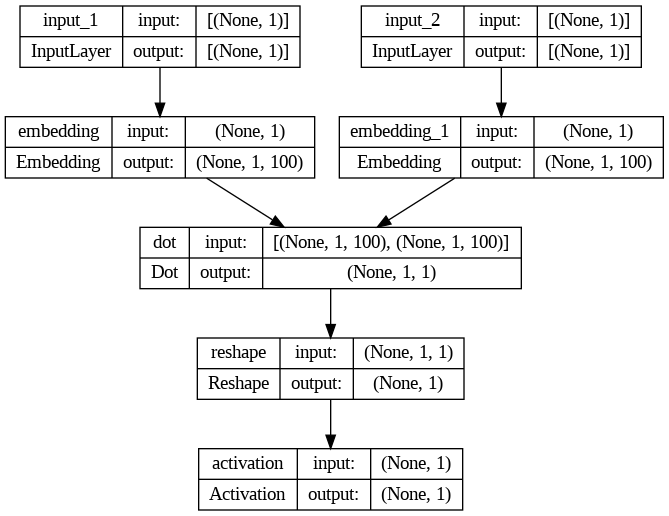

In [58]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [59]:
for epoch in range(100):
    loss = 0
    # for _, elem in enumerate(training_dataset):
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        y = labels
        loss += model.train_on_batch(X, y)
    print('Epoch:', epoch+1, 'Loss', loss)

Epoch: 1 Loss 6.932296514511108
Epoch: 2 Loss 6.898670554161072
Epoch: 3 Loss 6.865051865577698
Epoch: 4 Loss 6.8261608481407166
Epoch: 5 Loss 6.7789958119392395
Epoch: 6 Loss 6.721128582954407
Epoch: 7 Loss 6.650622665882111
Epoch: 8 Loss 6.565999984741211
Epoch: 9 Loss 6.466219782829285
Epoch: 10 Loss 6.350673198699951
Epoch: 11 Loss 6.219173848628998
Epoch: 12 Loss 6.07194447517395
Epoch: 13 Loss 5.909591794013977
Epoch: 14 Loss 5.7330756187438965
Epoch: 15 Loss 5.543675482273102
Epoch: 16 Loss 5.342949390411377
Epoch: 17 Loss 5.13268980383873
Epoch: 18 Loss 4.9148664474487305
Epoch: 19 Loss 4.691564053297043
Epoch: 20 Loss 4.464917063713074
Epoch: 21 Loss 4.237044274806976
Epoch: 22 Loss 4.009988218545914
Epoch: 23 Loss 3.785661071538925
Epoch: 24 Loss 3.565797507762909
Epoch: 25 Loss 3.351919114589691
Epoch: 26 Loss 3.1453125178813934
Epoch: 27 Loss 2.9470148384571075
Epoch: 28 Loss 2.7578150629997253
Epoch: 29 Loss 2.578262433409691
Epoch: 30 Loss 2.40868416428566
Epoch: 31 Loss 

In [60]:
import gensim

In [61]:
vectors = model.get_weights()[0]
vectors

array([[ 3.8970817e-02, -1.0897182e-02, -3.8450874e-02, ...,
        -4.0313888e-02,  2.1360341e-02,  2.3756150e-02],
       [ 2.4179347e-01, -2.5786564e-01, -2.4291746e-01, ...,
         2.3773463e-01, -2.9868793e-01, -2.3495202e-01],
       [-3.4038019e-01,  2.1287437e-01,  1.9208300e-01, ...,
        -3.1745422e-01, -3.3462659e-01, -1.1638159e-01],
       ...,
       [-2.5554895e-02,  5.5003390e-03,  9.6440315e-05, ...,
        -2.6176894e-02, -4.3679960e-03, -2.9283874e-03],
       [ 1.8086545e-03, -2.7651383e-02, -3.2215081e-02, ...,
        -3.5400368e-02,  2.9700402e-02,  2.5015596e-02],
       [-4.2948879e-02,  4.2209197e-02, -2.1647705e-02, ...,
         4.1830864e-02,  4.4712428e-02,  1.8633716e-03]], dtype=float32)

In [62]:
len(vectors)

76654

In [63]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i-1, :])))))
f.close()

In [64]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [65]:
w2v.most_similar(positive=['밥'])

[('톤', 0.8014567494392395),
 ('밀리', 0.7960244417190552),
 ('킬', 0.7868404984474182),
 ('정말', 0.7792108058929443),
 ('고', 0.7566336989402771),
 ('만', 0.7462251782417297),
 ('해서', 0.7438153028488159),
 ('를', 0.7246777415275574),
 ('다', 0.6662033200263977),
 ('가', 0.47122281789779663)]

In [70]:
w2v.most_similar(positive=["비싼"])

[('동그란거', 0.44711193442344666),
 ('카티프', 0.3989156186580658),
 ('추근', 0.39612144231796265),
 ('말테다', 0.3798655867576599),
 ('깔리기', 0.37623143196105957),
 ('좋았고요', 0.3719504177570343),
 ('빈약', 0.3632034659385681),
 ('놓거나', 0.3595588207244873),
 ('촉나라', 0.3577598035335541),
 ('보겠냐', 0.3567132353782654)]